In [1]:
# utilities :
import re # regular expression library
import numpy as np
import pandas as pd

# plotting :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk :
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# sklearn :
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# time library :
import time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# Importing the dataset :
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/Tweeter Dataset.csv',
                 encoding=DATASET_ENCODING,
                 names=DATASET_COLUMNS)

# Display of the first 5 lines :
df.sample(5)

,target,ids,date,flag,user,text
1234748,4,1992455974,Mon Jun 01 08:46:58 PDT 2009,NO_QUERY,robinshoots,@baileyloowho YEsssss... ask your sister. She...
256930,0,1984844180,Sun May 31 15:55:19 PDT 2009,NO_QUERY,sjas99,@joeymcintyre @jordanknight @dannywood @Jonath...
454051,0,2070497879,Sun Jun 07 17:48:03 PDT 2009,NO_QUERY,MarissaMarieeee,driving home from clackamas. just got out of t...
946549,4,1822722397,Sat May 16 20:14:01 PDT 2009,NO_QUERY,LauraDee2009,@wtcc so i cant figure it out. Are you a senio...
1294379,4,2003475210,Tue Jun 02 06:36:01 PDT 2009,NO_QUERY,CosasDelAmor,One English GCSE exam down one more too go


In [3]:
# Display of the first 5 lines of our dataset :
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
# Display the column names of our dataset :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
# Display the number of records is our dataset :
print('length of data is', len(df))

length of data is 1600000


In [6]:
df.shape

(1600000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df.dtypes

,0
target,int64
ids,int64
date,object
flag,object
user,object
text,object


In [9]:
# Checking for Null values :
np.sum(df.isnull().any(axis=1))

np.int64(0)

In [10]:
# Rows and columns in the dataset :
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [11]:
# Checking unique Target Values :
df['target'].unique()

array([0, 4])

In [12]:
df['target'].nunique()

2

In [13]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


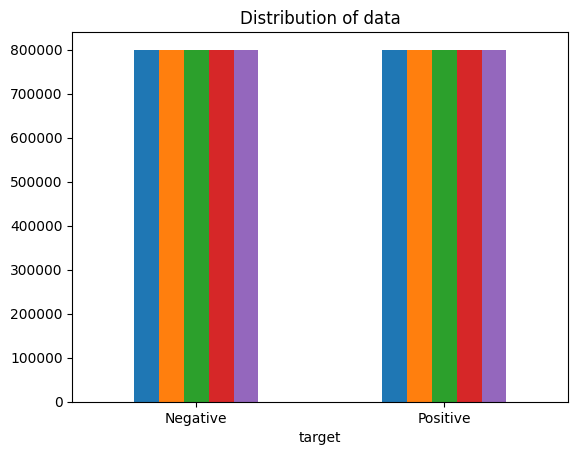

In [14]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

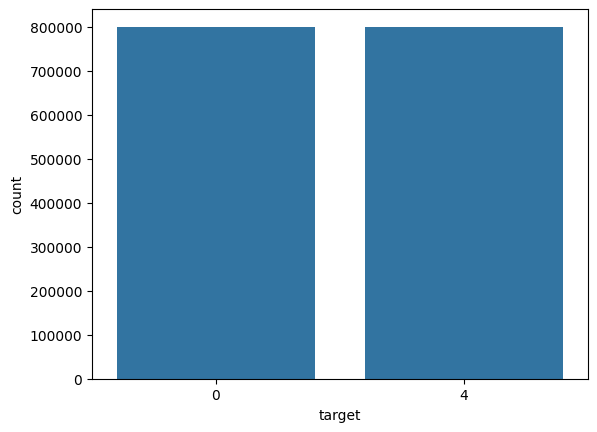

In [17]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [18]:
# Selecting the text and Target column for our further analysis :
data = df[['text','target']]

In [19]:
# Replacing the values to ease understanding :
data['target'] = data['target'].replace(4,1)

<ipython-input-19-e837cacf537b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [20]:
# Print unique values of target variable :
data['target'].unique()

array([0, 1])

In [21]:
# Separating positive and negative tweets :
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [22]:
# Combining positive and negative tweets :
dataset = pd.concat([data_pos, data_neg])

In [23]:
# Quick view of how our data looks:
dataset['text'].tail()

,text
799995,Sick Spending my day laying in bed listening ...
799996,Gmail is down?
799997,rest in peace Farrah! So sad
799998,@Eric_Urbane Sounds like a rival is flagging y...
799999,has to resit exams over summer... wishes he w...


In [24]:
# Making statement text in lower case :
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

,text
799995,sick spending my day laying in bed listening ...
799996,gmail is down?
799997,rest in peace farrah! so sad
799998,@eric_urbane sounds like a rival is flagging y...
799999,has to resit exams over summer... wishes he w...


In [25]:
# Defining set containing all stopwords in English :
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're',
                's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']


In [26]:
# Cleaning and removing the above stop words list from the tweet text :
STOPWORDS = set(stopwordlist)


def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
800000,love @health4uandpets u guys r best!!
800001,im meeting one besties tonight! cant wait!! - ...
800002,"@darealsunisakim thanks twitter add, sunisa! g..."
800003,sick really cheap hurts much eat real food plu...
800004,@lovesbrooklyn2 effect everyone


- **`text`** column has been cleaned of stop words.

In [27]:
#  Cleaning and removing punctuations :
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [28]:
# Cleaning and removing repeating characters :
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [29]:
# Cleaning and removing URL’s :
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [30]:
# Cleaning and removing Numeric numbers :
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylorswif
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [32]:
 import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [33]:
dataset['text'] = dataset['text'].apply(word_tokenize)
dataset['text'].head()

,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


In [34]:
# Applying Stemming :
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


In [35]:
# Applying Lemmatizer :
lm = nltk.WordNetLemmatizer()


def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


In [36]:
# Separating input feature and label :
X = data.text
y = data.target

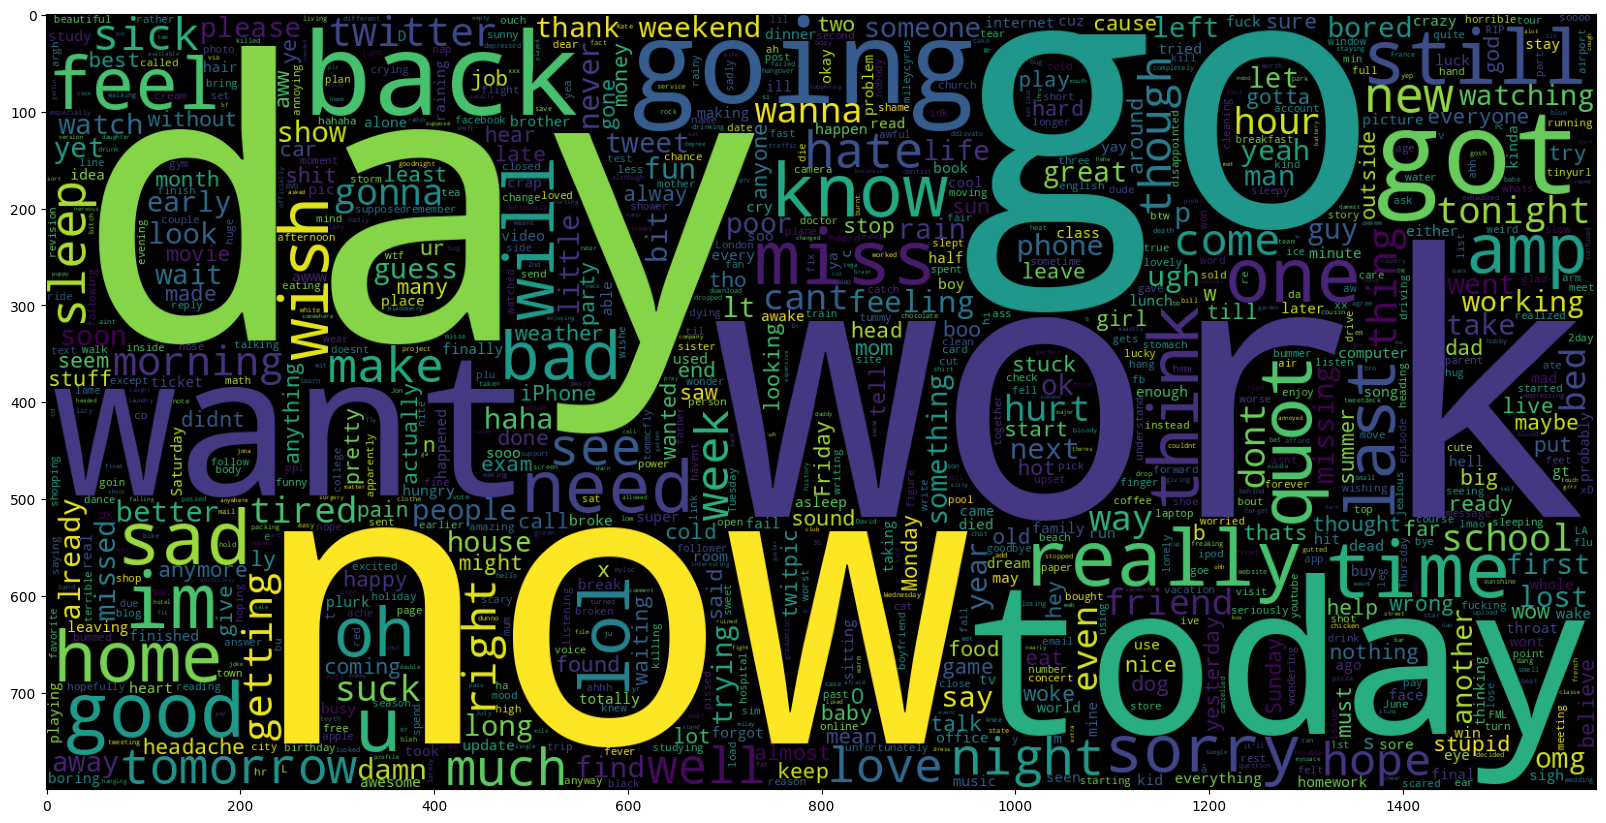

In [37]:
# Plot a cloud of words for negative tweets :
data_neg = data['text'][:800000] # selecting the negative tweets.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

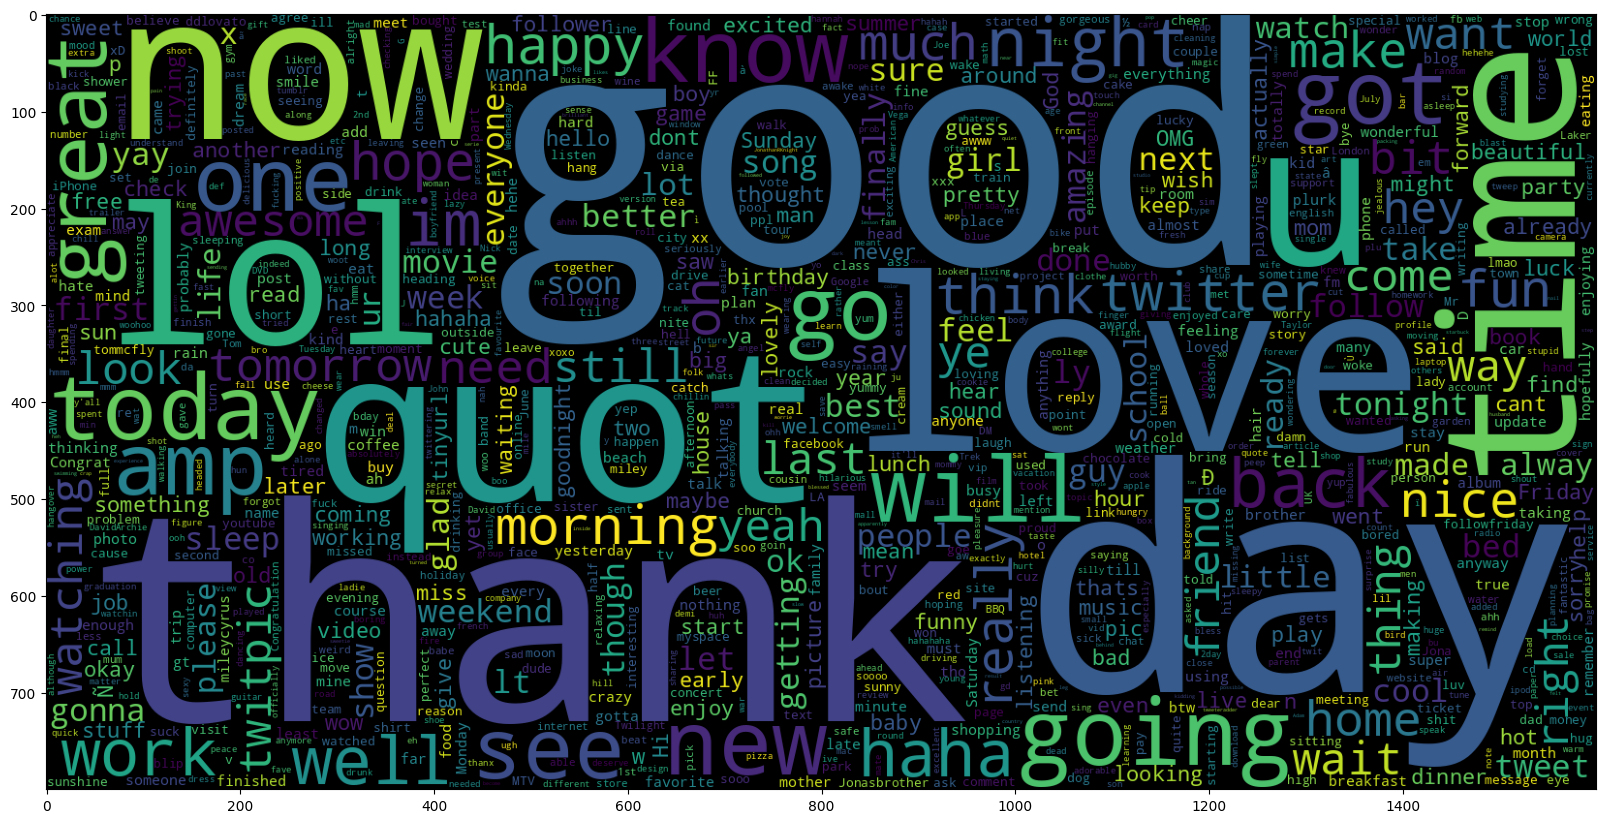

In [38]:
# Plot a cloud of words for positive tweets :
data_pos = data['text'][800000:]  # selecting the positive tweets.
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

In [39]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)

In [40]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [41]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1563059 stored elements and shape (80000, 500000)>

In [42]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

The execution time of this model is 0.87 seconds

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



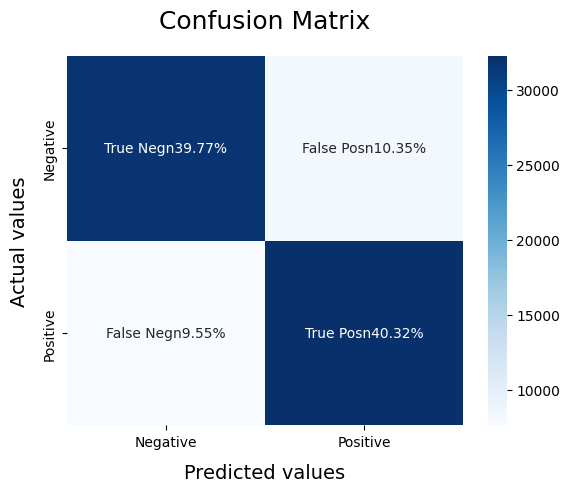

In [43]:
# Model-1 : Bernoulli Naive Bayes.
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

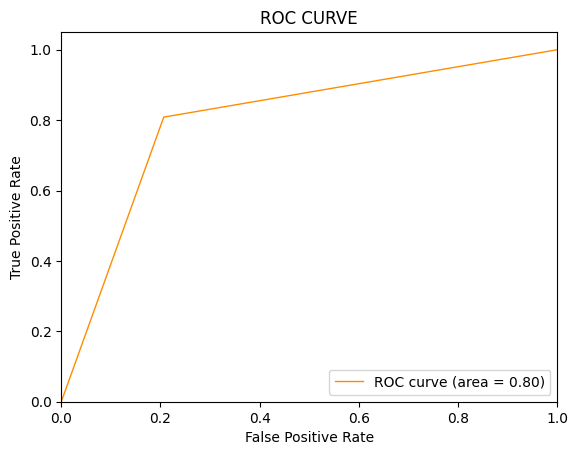

In [44]:
# Plot the ROC-AUC Curve for model-1 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

The execution time of this model is 193.11 seconds

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



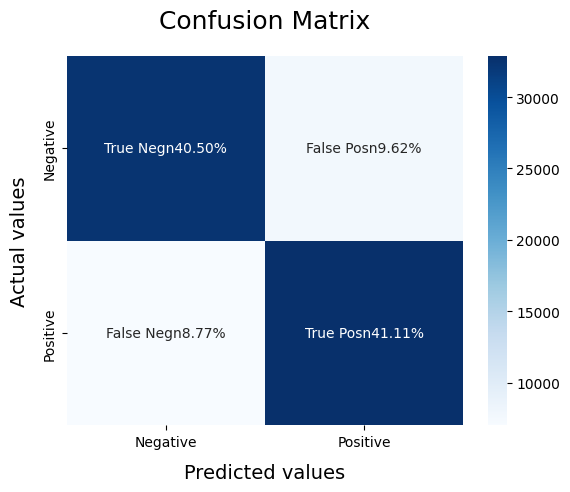

In [45]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC()
start = time.time()
SVCmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

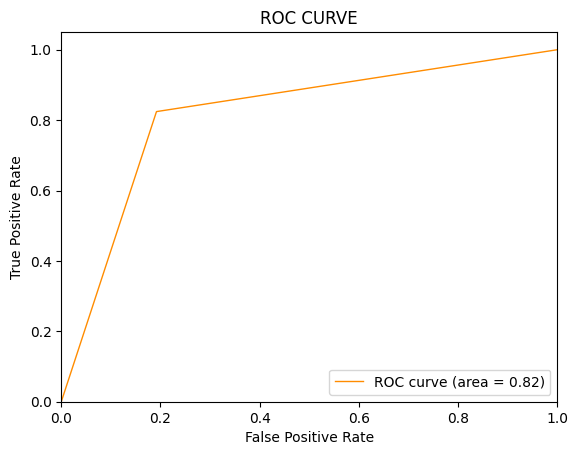

In [46]:
# Plot the ROC-AUC Curve for model-2 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

The execution time of this model is 28.92 seconds

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



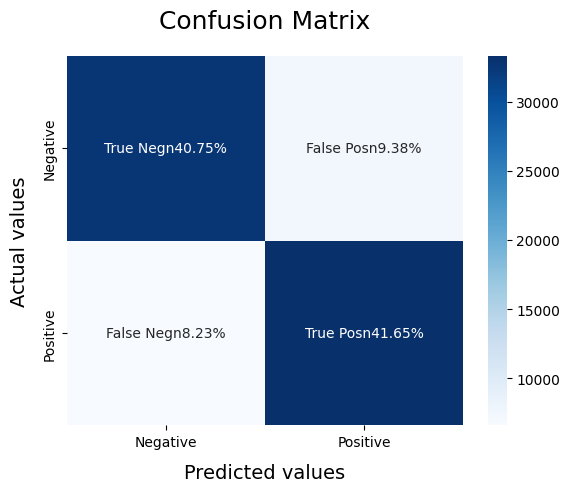

In [47]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
LRmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

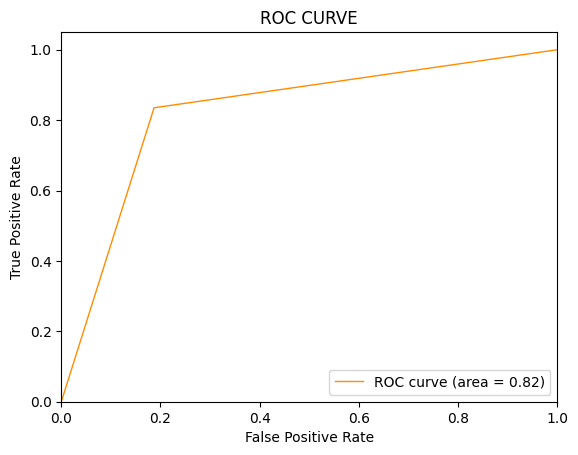

In [48]:
# Plot the ROC-AUC Curve for model-3 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()